In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from matplotlib.ticker import (MultipleLocator,FormatStrFormatter,AutoMinorLocator)


In [2]:
#function to load data and remove Nan
def load_data(dataset):
    df = pd.read_csv(dataset)
    df.fillna(0,inplace=True)
    df['submission_date'] = pd.to_datetime(df['submission_date'],errors='ignore')
    #print('These are the first 5 rows in the dataset')
    #df.head()
    return df
    

In [73]:
#function to extract relevant columns for specified state
def extract_column(df,state):
    df2 = df[['submission_date', 'state', 'tot_cases', 'tot_death']].copy()
    #df2['submission_date'] = pd.to_datetime(df['submission_date'],errors='ignore')
    df2.sort_values(by='submission_date', inplace = True)
    #df2['submission_date'] = pd.to_datetime(df['submission_date'],errors='ignore')
    df3 = df2[df.state == state].copy()
    return df3

In [74]:
#Plottting Total cases and Total Death for specific state ( according to user input)
def plot_state_cases(df,state):
    #df3 = df2[df.state == state]
    fig, ax = plt.subplots(figsize=(10, 7.5))
    ax2 = ax.twinx()
    date_time = pd.to_datetime(df['submission_date'])
    l1, = ax.plot(date_time, df['tot_cases'],color='blue', linewidth=3, linestyle='-',label='Total Cases')
    l2, = ax2.plot(date_time, df['tot_death'],color='red', linewidth=3, linestyle='-',label='Total death')
    plt.gcf().autofmt_xdate()

    ax.yaxis.set_major_formatter(FormatStrFormatter('% 1.0f'))

    ax.set_xlabel('Submission Date',fontsize=18)
    ax.set_ylabel('Total cases',fontsize=18,color='blue')
    ax2.set_ylabel('Total death',fontsize=18,color='red')
    ax.set_title(str(state) +' Covid-19 Cases',fontsize=18)

    ax.grid(color='green')
    ax.legend([l1, l2] ,['Total cases', 'Total Death'])
    plt.show()

In [104]:
# FUcntion to plot state covid-19 summary
def state_summary(df, state):
    fig =px.histogram(df, x= 'submission_date', y = ['tot_death','tot_cases', 'recovery'], 
             nbins=20, barmode='group', title =(str(state )+ ' Cummulative COVID-19 SUMMARY'))
    fig.update_yaxes(title_text = "Total Number")
    fig.update_xaxes(title_text = "Submission Date")
    fig.show()

In [131]:
#function to calculate and plot infection rate
def infection_rate(df):
    #Calculate infection rate
    df['infection_rate'] = df['tot_cases'].diff()
    
    #plot infection rate 
    fig =px.histogram(df, x= 'submission_date', y = 'infection_rate', nbins=120, title =(str(state )+ '  Infection Rate'))
    fig.update_yaxes(title_text = "Numbers")
    fig.update_xaxes(title_text = "Submission Date")
    fig.show()

In [144]:
#function to calculate and plot recovery

def calc_recovery(df):
    df['recovery'] = df['tot_cases'] - df['tot_death'] 

def recovery_rate(df,state):      
    df['recovery_rate'] = df['recovery'].diff().copy()
    fig =px.histogram(df, x= 'submission_date', y = 'recovery_rate',color_discrete_sequence =['green'],nbins=120,title =(str(state )+ ' Recovery Rate'))
    fig.update_yaxes(title_text = "No of Recoveries")
    fig.update_xaxes(title_text = "Submission Date")
    fig.show()

In [133]:
#function to calculate and plot death rate
def death_rate(df,state):
    #df3 = df2[df.state == state]
    df['death_rate'] = df['tot_death'].diff()
    #df[df < 0] = 0
  
    fig =px.histogram(df3, x= 'submission_date', y = 'death_rate', nbins=200,color_discrete_sequence=['indianred'],title =(str(state )+ ' Death Rate'))
    fig.update_yaxes(title_text = "No of Deaths")
    fig.update_xaxes(title_text = "Submission Date")
    fig.show()

In [134]:
#function to load data
dataset = 'United_States_COVID-19_Cases_and_Deaths_by_State_over_Time.csv'

# Covid-19 Spread in USA from 2020 till Date

In [135]:
df= load_data(dataset)
df2 = df[['submission_date', 'state', 'tot_cases', 'tot_death']].copy()
df2.sort_values(by='submission_date', inplace = True)
df2.head()
#df2.describe()
df2['submission_date'] = df2['submission_date'].astype(str)

#Generate plot of total cases in the US using choroplet
fig = px.choropleth(df2, locations = 'state', scope ='usa', locationmode = 'USA-states', color = 'tot_cases', animation_frame = 'submission_date')
fig.update_layout(title_text = 'USA COVID-19 SPREAD')
fig.show()


# Narrow down to any State using states abbreviation e,g TX, CA, KY

In [138]:
state= str(input("Enter abbreviation for state e,g Texas =TX :"))
df= load_data(dataset)
df3 = extract_column(df,state)


Enter abbreviation for state e,g Texas =TX :WI


C:\Users\yetty\AppData\Local\Temp\ipykernel_8520\3803232654.py:7: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



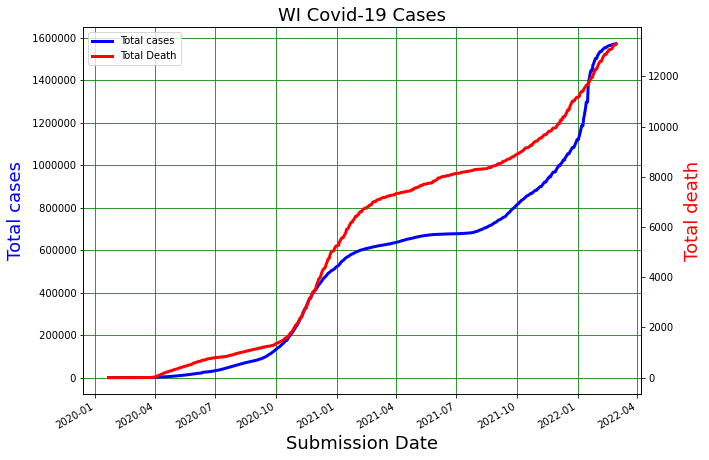

In [142]:
plot_state_cases(df3,state)

#calc_death_rate(df2)
#plot_death_rate(df2)

calc_recovery(df3)


#print state covid -19 summary
state_summary(df3,state)


#calculate and plot infection rate
infection_rate(df3)


In [145]:
#function to calculate and plot recovery rate
recovery_rate(df3,state)


In [146]:
#function to calculate and plot death rate
death_rate(df3,state)

In [103]:
USA_states = list(df['state'].unique())
USA_states = pd.Series(USA_states)
USA_states = USA_states.values
USA_states = USA_states.reshape((6,10))
USA_states=pd.DataFrame(USA_states)
USA_states

,0,1,2,3,4,5,6,7,8,9
0,ND,MD,CA,NE,ME,DE,WI,WA,IN,NC
1,MI,CT,AL,NV,VT,IL,ID,MS,MO,VI
2,GU,MT,NH,OR,FSM,RI,DC,WY,KY,SC
3,AZ,LA,NJ,MN,VA,KS,UT,CO,AR,PW
4,MA,PR,HI,TX,OK,NYC,GA,AK,AS,FL
5,WV,MP,NM,PA,IA,OH,SD,RMI,NY,TN
